# Spam Detector

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [166]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*I believe the Random Forest model will perform better because it can handle more complex models.  Logistic Regression in for a more linear approach and the data isn't pointing to a strict linear pattern.*

## Split the Data into Training and Testing Sets

In [167]:
# Create the labels set `y` and features DataFrame `X`
X = data.copy()
X = X.drop(columns='spam')

y = data["spam"]

In [168]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [169]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [170]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [171]:
# Fit the Standard Scaler with the training data
X_train_scaled = scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. Use a `random_state` of `1`. 

In [173]:
# Create and fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=1)

In [174]:
# Make and save testing predictions with the trained Logistic Regression model using the test data
y_prediction = lr_model.predict(X_test_scaled)

# Review the predictions
y_prediction

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [175]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy = accuracy_score(y_test, y_prediction)
accuracy

0.9278887923544744

## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. Use a `random_state` of `1`. 

In [176]:
# Create and fit a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=1)
rfc_model = rfc_model.fit(X_train_scaled, y_train)


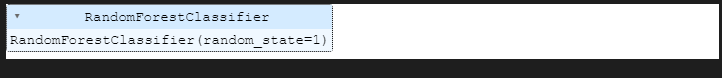

In [179]:
# Make and save testing predictions with the trained Random Forest Classifier model using the test data
rfc_predict = rfc_model.predict(X_test_scaled)

# Review the predictions
rfc_predict

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [180]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy = accuracy_score(y_test, rfc_predict)
accuracy

0.9669852302345786

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

The Random Forest Classifier model performed better.  My prediction was correct.  With an accuracy score of 96.7% (RFC) vs 92.8% for the (LR) model.  The RFC's performance was much better as it's designed to handle more complex datasets due to the ability to capture non-linear relationships.  LR is a linear model and struggles with non-linear datasets.